In [16]:
import json
import pandas as pd

def make_sentence(st):
  if pd.isna(st):
    return None
  data = st.replace("'", "\"")
  data = json.loads(data)
  ret = ""

  def handle_activity(activity):
    nonlocal ret
    ret += activity['activity']
    ret += ' of '
    ret += activity['primary_concept']
    if activity['supporting_concepts']:
      ret += ' supported by '
      ret += ", ".join(activity['supporting_concepts'])
    if activity['activities']:
      ret += ' with following: '
      for i in range(len(activity['activities'])):
        handle_activity(activity['activities'][i])
        if i != len(activity['activities']) - 1:
          ret += ', '

  for activity in data['lesson']:
    handle_activity(activity)
    ret += ". "
  return "lesson composed of " + ret


In [28]:
# import nltk
# nltk.download('punkt')
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize  # You may need to install the nltk library

# Sample sentence containing the word "graphing"
sample_sentence = "{'lesson': [{'activity': 'definition', 'primary_concept': 'eigenvalues and eigenvectors', 'supporting_concepts': ['matrix', 'scalar'], 'activities': [{'activity': 'visualization', 'primary_concept': 'eigenvalues and eigenvectors', 'supporting_concepts': ['vector', 'scalar multiplication'], 'activities': []}]}, {'activity': 'example', 'primary_concept': 'eigenvectors', 'supporting_concepts': ['matrix', 'scalar multiplication'], 'activities': []}, {'activity': 'example', 'primary_concept': 'eigenvalues', 'supporting_concepts': ['matrix', 'scalar multiplication'], 'activities': []}, {'activity': 'application', 'primary_concept': 'eigenvalues and eigenvectors', 'supporting_concepts': ['linear algebra', 'matrix transformation'], 'activities': []}, {'activity': 'additional resources', 'primary_concept': 'eigenvalues and eigenvectors', 'supporting_concepts': ['eigen spaces', 'linear algebra textbooks'], 'activities': []}]}"
sample_sentence.replace("'", "\"")
sample_sentence = make_sentence(sample_sentence)
sample_sentence = "lesson composed of definition of eigenvectors supported by eigenvalues, triangular matrices. example of eigenvalues supported by triangular matrices, proof with following: application of eigenvalues supported by specific matrix a, specific matrix b, practice. definition of triangular matrices supported by zeros, non-trivial solutions. definition of proof supported by scalar multiplication, identity matrix. example of eigenvalues supported by specific matrix a, specific matrix b, theorem application with following: visualization of eigenvalues supported by row operations, free variables. definition of distinct eigenvalues supported by eigenvectors, linear independence with following: example of eigenvectors supported by vectors, eigenvalues, proof by contradiction. example of distinct eigenvalues supported by linear independence, distinctness importance."

print(sample_sentence)
# Tokenize the sentence into words
tokens = word_tokenize(sample_sentence.lower())  # Lowercasing for consistency

# Create a Word2Vec model
model = Word2Vec([tokens], vector_size=100, window=5, min_count=1, workers=4)

# Save and load the model (optional)
model.save("word2vec_model.bin")
loaded_model = Word2Vec.load("word2vec_model.bin")

# Get the word embedding for "graphing"
embedding_for_graphing = loaded_model.wv['matrices']

print("Word Embedding for 'triangular matrices':")
print(embedding_for_graphing)


lesson composed of definition of eigenvectors supported by eigenvalues, triangular matrices. example of eigenvalues supported by triangular matrices, proof with following: application of eigenvalues supported by specific matrix a, specific matrix b, practice. definition of triangular matrices supported by zeros, non-trivial solutions. definition of proof supported by scalar multiplication, identity matrix. example of eigenvalues supported by specific matrix a, specific matrix b, theorem application with following: visualization of eigenvalues supported by row operations, free variables. definition of distinct eigenvalues supported by eigenvectors, linear independence with following: example of eigenvectors supported by vectors, eigenvalues, proof by contradiction. example of distinct eigenvalues supported by linear independence, distinctness importance.


KeyError: "Key 'matrices.' not present"

In [4]:
import pandas as pd



In [5]:
sentence_df = pd.read_csv('sentence_embed.csv')

In [12]:
sentences = sentence_df['sentence_embedding']
sentences

0      definition of eigenvalues and eigenvectors sup...
1      definition of least squares supported by proje...
2      definition of dimension of a vector space supp...
3      definition of subspaces supported by vector, z...
4      definition of determinants supported by invert...
                             ...                        
367    definition of eigenvectors supported by linear...
368    definition of matrix transformation supported ...
369    definition of span of vectors supported by lin...
370    definition of standard basis vectors supported...
371    definition of orthogonal set supported by orth...
Name: sentence_embedding, Length: 372, dtype: object

In [18]:
import numpy as np
for index, sentence in enumerate(sentences):
    # print(f"This is sentence {sentence}")
    try:
        tokens = word_tokenize(sentence.lower())
    except:
        # sentence is NaN: 
        node_embedding = np.random.random((10,1))
        continue
    model = Word2Vec([tokens], vector_size=10, window=5, min_count=1, workers=4)
    for token_index, token in enumerate(tokens):
        node_embedding = model.wv[token]
        if token_index % 10 == 0: print(f"10th Node Embedding : {node_embedding}")
            

10th Node Embedding : [ 0.04296055 -0.03739949  0.08380342  0.01522828 -0.07233337  0.09443428
  0.07635359  0.05499544 -0.06858732  0.05832607]
10th Node Embedding : [ 0.07817163 -0.09512209 -0.00194359  0.03463776 -0.00932772  0.08388429
  0.09017186  0.06543916 -0.00722585  0.07721324]
10th Node Embedding : [ 0.00104669  0.0307012  -0.06807164 -0.01395066  0.07685676  0.07362975
 -0.03642753  0.02673657 -0.08354022  0.06223521]
10th Node Embedding : [-0.00859229  0.02822908  0.05404367  0.07045349 -0.05693035  0.01863757
  0.06094412 -0.04788371 -0.03119718  0.06804956]
10th Node Embedding : [-0.00859229  0.02822908  0.05404367  0.07045349 -0.05693035  0.01863757
  0.06094412 -0.04788371 -0.03119718  0.06804956]
10th Node Embedding : [ 0.07409913 -0.0154215  -0.04549216  0.0647161  -0.04794323 -0.01758652
  0.02940713  0.01069394 -0.08389424 -0.09372824]
10th Node Embedding : [-0.00516834  0.00231558  0.05111473  0.08991425 -0.09285887 -0.0709464
  0.0648485   0.08999748 -0.05064307

Node Features: {1: [1, 2, 3], 2: [3, 4, 5], 3: [6, 7, 8], 4: [9, 10, 11]}


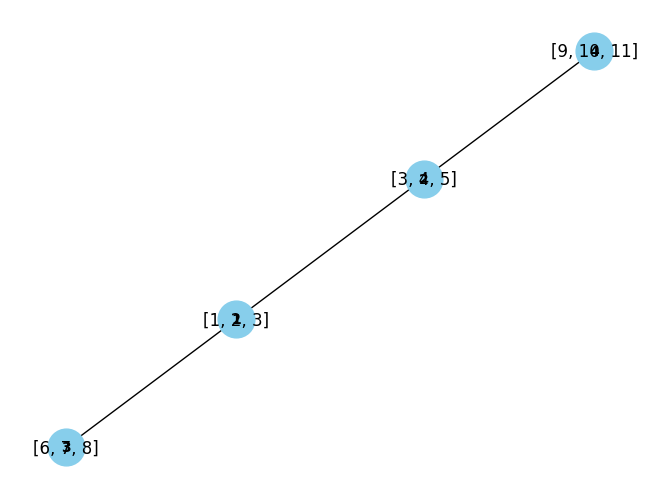

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes with features
G.add_node(1, feature=[1,2,3])
G.add_node(2, feature=[3,4,5])
G.add_node(3, feature=[6,7,8])
G.add_node(4, feature=[9,10,11])

# Add edges
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 4)

# Access node features
node_features = nx.get_node_attributes(G, 'feature')
print("Node Features:", node_features)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
node_labels = nx.get_node_attributes(G, 'feature')
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Show the plot
plt.show()


In [4]:
node_features

{1: [1, 2, 3], 2: [3, 4, 5], 3: [6, 7, 8], 4: [9, 10, 11]}

In [2]:
from evaluation_metrics.score_predictor import Score_Predictor

score_predictor_model = Score_Predictor('2023_12_14', '10', 'linear', embeddings_method="hyperbolic")
score_predictor_model.regression()

Using Log Path : logs\lp\2023_12_14\10
TRAIN INDICES [0, 10, 100, 102, 103, 105, 107, 11, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 12, 120, 121, 122, 123, 124, 125, 127, 128, 129, 13, 130, 132, 133, 134, 136, 137, 139, 141, 142, 143, 144, 145, 148, 149, 15, 150, 151, 152, 154, 155, 156, 158, 16, 160, 163, 164, 166, 17, 170, 171, 173, 176, 177, 178, 180, 181, 185, 186, 188, 19, 190, 191, 193, 194, 196, 197, 198, 199, 20, 200, 203, 204, 205, 206, 208, 209, 21, 211, 213, 214, 215, 216, 218, 219, 22, 220, 224, 225, 226, 227, 228, 229, 23, 231, 234, 235, 239, 24, 241, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 26, 260, 261, 262, 263, 264, 266, 267, 268, 27, 272, 273, 274, 277, 278, 279, 28, 280, 281, 282, 283, 284, 285, 287, 288, 289, 29, 290, 291, 292, 293, 294, 295, 296, 297, 298, 3, 302, 303, 304, 305, 306, 308, 309, 310, 312, 313, 315, 316, 317, 32, 321, 322, 323, 324, 326, 327, 33, 330, 331, 332, 333, 334, 335, 337, 338, 340, 344, 345,

  0%|                                                                                          | 0/334 [00:00<?, ?it/s]

THIS IS EMBEDDINGS :  [[ 1.0996063  -0.44623297  0.10005059]
 [ 1.0999705  -0.4462653   0.10383827]
 [ 1.1002101  -0.43050537  0.15851605]
 [ 1.1002101  -0.43050537  0.15851605]
 [ 1.1004497  -0.43955952  0.13332973]
 [ 1.1000661  -0.44931403  0.09089693]
 [ 1.1000661  -0.44931403  0.09089693]
 [ 1.0999902  -0.4488885   0.09207468]
 [ 1.1006985  -0.45545137  0.06404067]
 [ 0.          0.          0.        ]
 [ 1.0993578  -0.44011462  0.12201103]
 [ 1.1000212  -0.44693848  0.10145314]
 [ 1.1000212  -0.44693848  0.10145314]
 [ 1.1000925  -0.44280323  0.11886465]
 [ 1.1000675  -0.45125988  0.08070285]
 [ 1.1000675  -0.45125988  0.08070285]
 [ 1.1007824  -0.44695458  0.10933202]
 [ 1.1000412  -0.44823012  0.09581388]
 [ 1.1000412  -0.44823012  0.09581388]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 

C:\Users\rarh9\Desktop\MIT\6.8610\educational_concept_librarian\evaluation_metrics\score_predictor.py:68: RuntimeWarning: invalid value encountered in arccosh
  return [np.arccosh(-1 * inner_product(origin, coord)) for coord in embeddings]
  4%|███▌                                                                            | 15/334 [00:00<00:02, 149.84it/s]

THIS IS EMBEDDINGS :  [[ 1.1000434  -0.44259915  0.11917004]
 [ 1.0998768  -0.44709724  0.0991613 ]
 [ 1.1000434  -0.44259915  0.11917004]
 [ 1.1000434  -0.44259915  0.11917004]
 [ 1.1000434  -0.44259915  0.11917004]
 [ 1.1000311  -0.44531003  0.10847764]
 [ 1.1000402  -0.44569024  0.10699846]
 [ 1.1000402  -0.44569024  0.10699846]
 [ 0.          0.          0.        ]
 [ 1.0997396  -0.43870506  0.13024956]
 [ 1.10077    -0.4512492   0.0898262 ]
 [ 1.10077    -0.4512492   0.0898262 ]
 [ 1.10077    -0.4512492   0.0898262 ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 

 14%|███████████                                                                     | 46/334 [00:00<00:02, 139.55it/s]

THIS IS V,  [ 1.1000643  -0.44709674  0.101222  ]
THIS IS V,  [ 1.1000643  -0.44709674  0.101222  ]
THIS IS V,  [ 1.0999857  -0.44186577  0.1213392 ]
THIS IS V,  [ 1.1000051  -0.444252    0.11247896]
THIS IS V,  [ 1.1000051  -0.444252    0.11247896]
THIS IS V,  [ 1.100294   -0.44140518  0.1257309 ]
THIS IS V,  [ 1.100364   -0.4473854   0.10318521]
THIS IS V,  [ 1.100364   -0.4473854   0.10318521]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [ 1.1007662  -0.44392696  0.12089197]
THIS IS V,  [ 1.1010598  -0.44605887  0.11560362]
THIS IS V,  [ 1.1010598  -0.44605887  0.11560362]
THIS IS V,  [ 1.1013048  -0.44650793  0.11620104]
THIS IS V,  [ 1.1000724  -0.45189604  0.0771315 ]
THIS IS V,  [ 1.0998511  -0.44404754  0.11177743]
THIS IS V,  [ 1.1000314  -0.44181156  0.12194914]
THIS IS V,  [ 1.1000314  -0.44181156  0.12194914]
THIS IS V,  [ 1.099816   -0.4468138   0.09976308]
THIS IS V,  [ 1.100004   -0.44570324  0.10657109]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS 

 24%|██████████████████▉                                                             | 79/334 [00:00<00:01, 141.95it/s]

[0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS EMBEDDINGS :  [[ 1.1002454  -0.4394079   0.13213815]
 [ 1.1048028  -0.46024472  0.09361649]
 [ 1.1002454  -0.4394079   0.13213815]
 [ 1.1002454  -0.4394079   0.13213815]
 [ 1.1002454  -0.4394079   0.13213815]
 [ 1.100114   -0.4427658   0.1192028 ]
 [ 1.1000527  -0.45035514  0.08541833]
 [ 1.1000527  -0.45035514  0.08541833]
 [ 1.1000527  -0.45035514  0.08541833]
 [ 1.1000527  -0.45035514  0.08541833]
 [ 1.0994972  -0.43138397  0.15100287]
 [ 0.          0.          0.        ]
 [ 1.1320374  -0.5211865   0.09936471]
 [ 1.1320374  -0.5211865   0.09936471]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.         

 33%|█████████████████████████▊                                                     | 109/334 [00:00<00:01, 136.24it/s]

 [ 1.1000228  -0.44783437  0.09743959]
THIS IS V,  [ 1.1000228  -0.44783437  0.09743959]
THIS IS V,  [ 1.1000228  -0.44783437  0.09743959]
THIS IS V,  [ 1.1004715  -0.44781345  0.10247354]
THIS IS V,  [ 1.1003511  -0.45041174  0.08889202]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [ 1.1006029  -0.4411025   0.12944177]
THIS IS V,  [ 1.1015925  -0.44560233  0.12224837]
THIS IS V,  [ 1.1015925  -0.44560233  0.12224837]
THIS IS V,  [ 1.1011986  -0.44561198  0.11860944]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS E

 41%|████████████████████████████████▍                                              | 137/334 [00:01<00:01, 135.38it/s]

 [ 1.1000825  -0.4446419   0.11169244]
THIS IS V,  [ 1.1002458  -0.44898465  0.09462474]
THIS IS V,  [ 1.1000627  -0.44381103  0.11475942]
THIS IS V,  [ 1.1000627  -0.44381103  0.11475942]
THIS IS V,  [ 1.0996276  -0.44647247  0.09921288]
THIS IS V,  [ 1.1011839  -0.44959065  0.10234353]
THIS IS V,  [ 1.1011839  -0.44959065  0.10234353]
THIS IS V,  [ 1.1011839  -0.44959065  0.10234353]
THIS IS V,  [ 1.0999671  -0.44732472  0.09913689]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [ 1.1093986  -0.46605033  0.11645732]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS 

 49%|███████████████████████████████████████                                        | 165/334 [00:01<00:01, 132.59it/s]

THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS EMBEDDINGS :  [[ 1.1007576  -0.451379    0.08901861]
 [ 1.0995001  -0.44550177  0.10212056]
 [ 1.1007576  -0.451379    0.08901861]
 [ 1.1007576  -0.451379    0.08901861]
 [ 0.          0.          0.        ]
 [ 1.0999554  -0.44085425  0.12469826]
 [ 1.1000161  -0.44830143  0.09519072]
 [ 1.1000161  -0.44830143  0.09519072]
 [ 1.1000161  -0.44830143  0.09519072]
 [ 1.1004484  -0.44337672  0.12001528]
 [ 1.1001129  -0.4505689   0.08506536]
 [ 1.1001129  -0.4505689   0.08506536]
 [ 1.1001129  -0.4505689   0.08506536]
 [ 1.0998559  -0.44670781  0.10067352]
 [ 1.100407   -0.4416843   0.1257399 ]
 [

 58%|█████████████████████████████████████████████▉                                 | 194/334 [00:01<00:01, 128.85it/s]

[ 1.1000222  -0.43827647  0.13402459]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [ 1.100342   -0.44216815  0.12345014]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS EMBEDDINGS :  [[ 1.1017891  -0.44827825  0.11395474]
 [ 1.0999885  -0.4424689   0.11914692]
 [ 1.1001678  -0.4431121   0.1184094 ]
 [ 1.1001678  -0.4431121   0.1184094 ]
 [ 1.1001678  -0.4431121   0.1184094 ]
 [ 1.0999941  -0.44284576  0.11779051]
 [ 1.10023    -0.4396653   0.13115026]
 [ 1.10023    -0.4396653   0.13115026]
 [ 

 67%|████████████████████████████████████████████████████▋                          | 223/334 [00:01<00:00, 132.12it/s]


THIS IS EMBEDDINGS :  [[ 1.099953   -0.44682047  0.10123295]
 [ 1.1000897  -0.45133817  0.0805663 ]
 [ 1.1001812  -0.4395957   0.13097446]
 [ 1.1001812  -0.4395957   0.13097446]
 [ 1.1000937  -0.44105837  0.12519439]
 [ 0.          0.          0.        ]
 [ 1.1000043  -0.44831493  0.09499022]
 [ 1.1003748  -0.43489537  0.14727771]
 [ 1.100058   -0.45046222  0.08491918]
 [ 1.100222   -0.4541193   0.06529844]
 [ 1.1006461  -0.45399705  0.07286048]
 [ 1.1003456  -0.45204252  0.08011222]
 [ 1.1000148  -0.4462249   0.10447931]
 [ 1.0994878  -0.4435591   0.11013013]
 [ 1.1018505  -0.4575538   0.06869496]
 [ 1.1018505  -0.4575538   0.06869496]
 [ 1.099813   -0.44923002  0.08820931]
 [ 1.100061   -0.45253944  0.07309196]
 [ 1.100061   -0.45253944  0.07309196]
 [ 1.1000528  -0.45202488  0.07608995]
 [ 1.1007668  -0.42830437  0.16805601]
 [ 1.1007668  -0.42830437  0.16805601]
 [ 1.0995697  -0.44857907  0.08848901]
 [ 1.1001515  -0.44486704  0.11147551]
 [ 1.1001515  -0.44486704  0.11147551]
 [

 75%|███████████████████████████████████████████████████████████▏                   | 250/334 [00:01<00:00, 127.57it/s]

THIS IS EMBEDDINGS :  [[ 1.1004105  -0.44375885  0.11824184]
 [ 1.1000946  -0.4437647   0.11524216]
 [ 1.1030148  -0.46116096  0.06302588]
 [ 1.1030148  -0.46116096  0.06302588]
 [ 1.1001242  -0.4413412   0.12446361]
 [ 1.1010488  -0.43277574  0.15815718]
 [ 1.1010488  -0.43277574  0.15815718]
 [ 1.1010488  -0.43277574  0.15815718]
 [ 1.1010488  -0.43277574  0.15815718]
 [ 1.1010488  -0.43277574  0.15815718]
 [ 1.1000439  -0.43743148  0.1369316 ]
 [ 1.1035193  -0.44196555  0.14973736]
 [ 1.1035193  -0.44196555  0.14973736]
 [ 1.0998671  -0.4410776   0.12311844]
 [ 0.          0.          0.        ]
 [ 1.1000998  -0.43852228  0.13385752]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 

 84%|██████████████████████████████████████████████████████████████████▍            | 281/334 [00:02<00:00, 136.25it/s]


THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS V,  [0. 0. 0.]
THIS IS EMBEDDINGS :  [[ 1.1000832  -0.44482654  0.11096171]
 [ 1.100058   -0.4440363   0.11383808]
 [ 1.1000866  -0.44484985  0.11090106]
 [ 1.1000866  -0.44484985  0.11090106]
 [ 1.1000651  -0.44436866  0.1126036 ]
 [ 1.1000924  -0.44447958  0.11243308]
 [ 1.1000469  -0.44388872  0.11430646]
 [ 1.1000559  -0.44465375  0.11138263]
 [ 1.1000469  -0.44388872  0.11430646]
 [ 1.1001072  -0.44489738  0.11091506]
 [ 1.1001072  -0.44489738  0.11091506]
 [ 1.1001072  -0.44489738  0.11091506]
 [ 0.          0.          0.        ]
 [ 1.1000469  -0.44388872  0.11430646]
 [ 1.1000836  -0.44490546  0.11064814]
 [ 0.          0.       

 97%|████████████████████████████████████████████████████████████████████████████▋  | 324/334 [00:02<00:00, 132.07it/s]

THIS IS EMBEDDINGS :  [[ 1.1001753  -0.4447279   0.11226138]
 [ 1.1000565  -0.44487807  0.11048966]
 [ 1.1002104  -0.44481567  0.11225853]
 [ 1.1002104  -0.44481567  0.11225853]
 [ 1.1002104  -0.44481567  0.11225853]
 [ 1.1002104  -0.44481567  0.11225853]
 [ 1.1000594  -0.44491503  0.11036883]
 [ 1.1001855  -0.44527814  0.11016162]
 [ 1.1001855  -0.44527814  0.11016162]
 [ 1.1001855  -0.44527814  0.11016162]
 [ 1.1001183  -0.4450888   0.11025474]
 [ 1.1000652  -0.44508415  0.10974365]
 [ 1.100068   -0.44441462  0.11245094]
 [ 1.100135   -0.44409204  0.1143645 ]
 [ 0.          0.          0.        ]
 [ 1.100135   -0.44409204  0.1143645 ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 

100%|███████████████████████████████████████████████████████████████████████████████| 334/334 [00:02<00:00, 131.71it/s]


Scaling Projected Train Embeddings :


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values